# Eigenvalues and Eigenvectors


This code is to help us in the computation of matrix-vector multiplications, instead of doing them by hand. [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ChemAI-Lab/Math4Chem/blob/main/website/Lecture_Notes/Notes/Coding/eigenvalue_decomposition.ipynb)

**Lecture Notes:**  [![Download PDF](https://img.shields.io/badge/Download_PDF-Click_Here-blue.svg)](https://github.com/ChemAI-Lab/Math4Chem/raw/main/website/Lecture_Notes/Notes/Eigenvalue_problem.pdf)

In [ ]:
import numpy as np

# The linear combination of two eigenvector with the same eigenvalue is an eigenvector

In class we saw that the linear combination of two eigenvector with the same eigenvalue, is also an eigenvector with the same eigenvalue.
$$
\mathbf{x}_{new} = c_1 \mathbf{x}_1 + c_2 \mathbf{x}_2 \\
\mathbf{A} \mathbf{x}_{new} = \mathbf{A}(c_1 \mathbf{x}_1 + c_2 \mathbf{x}_2) = c_1 \mathbf{A}\mathbf{x}_1 + c_2 \mathbf{A}\mathbf{x}_2 \\
\mathbf{A} \mathbf{x}_{new} = c_1 \lambda \mathbf{x}_1 + c_2 \lambda \mathbf{x}_2 = \lambda (c_1 \mathbf{x}_1 + c_2 \mathbf{x}_2) = \lambda \mathbf{x}_{new}

In [2]:
A = np.array([[2, 1, -1],[1,2,-1],[-1, -1, 2]])
print('Matrix A')
print(A)


Matrix A
[[ 2  1 -1]
 [ 1  2 -1]
 [-1 -1  2]]


This matrix has degenerate eigenvalues.

In [3]:
v,ev = np.linalg.eigh(A)
print('Eigenvalues')
print(v)
print('Eigenvectors (column-wise)')
print(ev)


Eigenvalues
[1. 1. 4.]
Eigenvectors (column-wise)
[[-0.77615053  0.2534897  -0.57735027]
 [ 0.60760378  0.54542122 -0.57735027]
 [-0.16854674  0.79891092  0.57735027]]


In [4]:
l1 = v[0]
x_1 = ev[:,0]
x_2 = ev[:,1]
c1,c2 = np.random.uniform(0,1,size=2)
print('Linear weights', 'c1 = ', c1, 'c2 = ', c2)
# any combination of eigenvectors with the same eigenvalue is also an eigenvector
x_new = c1*x_1 + c2*x_2
Ax = A@x_new
l_x_new = l1*x_new
print('A x_new')
print(Ax)
print('lambda x_new')
print(l_x_new)
print('Difference between A x_new and lambda x_new')
print(np.linalg.norm(Ax - l_x_new))

print(x_1.T @ A @ x_1)

Linear weights c1 =  0.28573680983809413 c2 =  0.38518007103200713
A x_new
[-0.12413559  0.38370015  0.25956456]
lambda x_new
[-0.12413559  0.38370015  0.25956456]
Difference between A x_new and lambda x_new
3.510833468576701e-16
0.9999999999999993


# Eigenpairs for matrix reconstruction
$$
\mathbf{A} \mathbf{V} = \mathbf{V} \mathbf{\Lambda}
$$
where, 
$\mathbf{V}$ is an orthogonal matrix (i.e., $\mathbf{V}^T \mathbf{V} = \mathbf{I}$), where $\mathbf{I}$ is the identity matrix. <br>
Each column of the matrix $\mathbf{V}$ represents an eigenvector $\mathbf{v}_i$.<br>
$\mathbf{\Lambda}$ is a diagonal matrix, where each diagonal element $\lambda_i$ is the eigenvalue corresponding to the eigenvector $\mathbf{v}_i$. <br>

Using these properties, we can derive the following relationship,
$$
\mathbf{A} = \mathbf{V}\mathbf{\Lambda}\mathbf{V}^\top \\
\mathbf{A} = \begin{pmatrix} 
\mathbf{v}_0, & \mathbf{v}_1, & \cdots & \mathbf{v}_n
\end{pmatrix}\begin{pmatrix} 
\lambda_0 & 0 & \cdots & 0 \\
0 &  \lambda_1 & \cdots & 0 \\
0 & 0 & \cdots & \lambda_n 
\end{pmatrix}\begin{pmatrix} 
\mathbf{v}_0^\top \\ 
\mathbf{v}_1^\top \\
\vdots \\
 \mathbf{v}_n^\top
\end{pmatrix}
$$
this relationship resembles the SVD decomposition that we saw to invert rectamgular matrices. <br>
We can use fewer eigenpairs to reconstruct the matrix $\mathbf{A}$,
$$
\underbrace{\mathbf{A}_{rec}}_{(n,n)} = \underbrace{\begin{pmatrix} 
\mathbf{v}_0, & \mathbf{v}_1, & \cdots & \mathbf{v}_m
\end{pmatrix}}_{(n,m)}\underbrace{\begin{pmatrix} 
\lambda_0 & 0 & \cdots & 0 \\
0 &  \lambda_1 & \cdots & 0 \\
0 & 0 & \cdots & \lambda_m 
\end{pmatrix}}_{(m,m)}\underbrace{\begin{pmatrix} 
\mathbf{v}_0^\top \\ 
\mathbf{v}_1^\top \\
\vdots \\
\mathbf{v}_m^\top
\end{pmatrix}}_{(m,n)}
$$

In [7]:

# Define the matrix
matrix = np.array([[-1, 1],
                   [1, 0]])

# Calculate eigenvalues and eigenvectors
e, ev = np.linalg.eigh(matrix)

# Print the results
print("Matrix:")
print(matrix)
print("\nEigenvalues:")
print(e)
print("\nEigenvectors (column-wise):")
print(ev)

for i in range(1,3):
    print('Number of eigen pairs ', i)
    A_rec = ev[:,:i] @ np.diag(e[:i]) @ ev.T[:i,:]
    print(A_rec)
    print('--------------------------------')

print('Using the eigenpair with the largest eigenvalue')
A_rec = ev[:, -1:] @ np.diag(e[-1:]) @ ev.T[-1:,:]
print(A_rec)

Matrix:
[[-1  1]
 [ 1  0]]

Eigenvalues:
[-1.61803399  0.61803399]

Eigenvectors (column-wise):
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]
Number of eigen pairs  1
[[-1.17082039  0.7236068 ]
 [ 0.7236068  -0.4472136 ]]
--------------------------------
Number of eigen pairs  2
[[-1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  5.55111512e-17]]
--------------------------------
Using the eigenpair with the largest eigenvalue
[[0.17082039 0.2763932 ]
 [0.2763932  0.4472136 ]]


# Time-dependent ODE
For an linear set of ODEs, of the form,
$$
\frac{d\; \mathbf{x}(t)}{d\;t} = A\mathbf{x}(t)
$$
The solution to the system is, 
$$
\mathbf{x}(t) = e^{At}\mathbf{x}(0)
$$
where $e^{At}$ is the matrix exponential, **which is not the same as the exponentiation each element of the matrix**. <br>
If we rewrite $\mathbf{x}(0)$ in terms of the eigenvectors of the matrix $A$, then we find the following general solution,
$$
\mathbf{x}(t) = \sum_i c_i e^{\lambda_i t} \mathbf{v}_i
$$
where $\mathbf{x}_i$ and $\lambda_i$ are the eigenvectors and eigenvalues of the matrix $A$. <br>
The coefficients $ci$ are simply parameters of the general solution. One can find its values using initial value conditions, for example the value of $\mathbf{x}(t=0)$, 
$$
\mathbf{x}(0) = \begin{pmatrix} 
a_0 \\ b_0 \\ c_0
\end{pmatrix}
$$

By defining a set of linear equations, we can find teh value of the coefficients $ci$, for example for a $3\times 3$ system,
$$
\mathbf{x}(0) = \begin{pmatrix} 
a_0 \\ b_0 \\ c_0
\end{pmatrix} = \sum_i^{3} c_i \mathbf{v}_i = \mathbf{U}^\top\mathbf{c},
$$
where $\mathbf{U}$ is the matrix whose columns are the eigenvectors of $A$, and $\mathbf{c}^\top = [c_1, c_2, c_3]$. If we multiply from the right by the transpose of $\mathbf{U}$ and we take advantage that $\mathbf{U}$ is an orthogonal matrix, we get,
$$
\mathbf{c} = \mathbf{U}\mathbf{x}(0).
$$


Eigenvalues
[-0.56016791 -0.26601231 -0.07381978]
Eigenvectors
[[-0.91479302 -0.31591783 -0.25169356]
 [ 0.35161639 -0.92950667 -0.11128009]
 [ 0.19879548  0.19029783 -0.96138811]]
Coefficients
[-0.87963138 -0.4088685  -0.26282157]


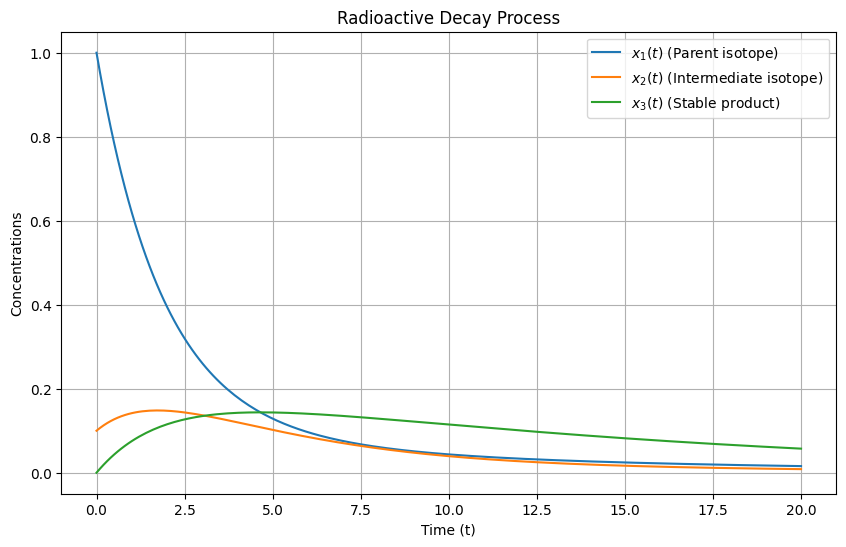

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 3x3 decay matrix A
A = np.array([[-0.5, 0.1, 0.1],
              [0.1, -0.3, 0.1],
              [0.1, 0.0, -0.1]]) 

# Initial condition x(0)
x0 = np.array([1.0, 0.1, 0.])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(A)
print('Eigenvalues')
print(eigenvalues)

print('Eigenvectors')
print(eigenvectors)

# Projection to find coefficients c1, c2, c3
coefficients = eigenvectors.T @ x0
print('Coefficients')
print(coefficients)

# Define the time range
t = np.linspace(0, 20, 200)  # Time from 0 to 20 units

# Compute x(t) = sum of c_i * exp(lambda_i * t) * v_i for all eigenpairs
x_t = np.zeros((len(t), 3))
for i in range(3):
    x_t += coefficients[i] * np.exp(eigenvalues[i]
                                    * t)[:, None] * eigenvectors[:, i]

# Plotting the components of x(t)
plt.figure(figsize=(10, 6))
plt.plot(t, x_t[:, 0], label='$x_1(t)$ (Parent isotope)')
plt.plot(t, x_t[:, 1], label='$x_2(t)$ (Intermediate isotope)')
plt.plot(t, x_t[:, 2], label='$x_3(t)$ (Stable product)')
plt.title('Radioactive Decay Process')
plt.xlabel('Time (t)')
plt.ylabel('Concentrations')
plt.legend()
plt.grid()
plt.show()